In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('insurance (2).csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking for missing values in all columns

In [4]:
for i in df.columns:
    print("{}:{}".format(i,df[i].isnull().sum()))

age:0
sex:0
bmi:0
children:0
smoker:0
region:0
charges:0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.corr()['charges'][:-1]

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

5 point summary of numerical variables

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Box plot can be used to check for outliers 
By looking at the plots we can say that outliers do exists in 'bmi' and 'charges'.Let's assume those are genuine outliers.

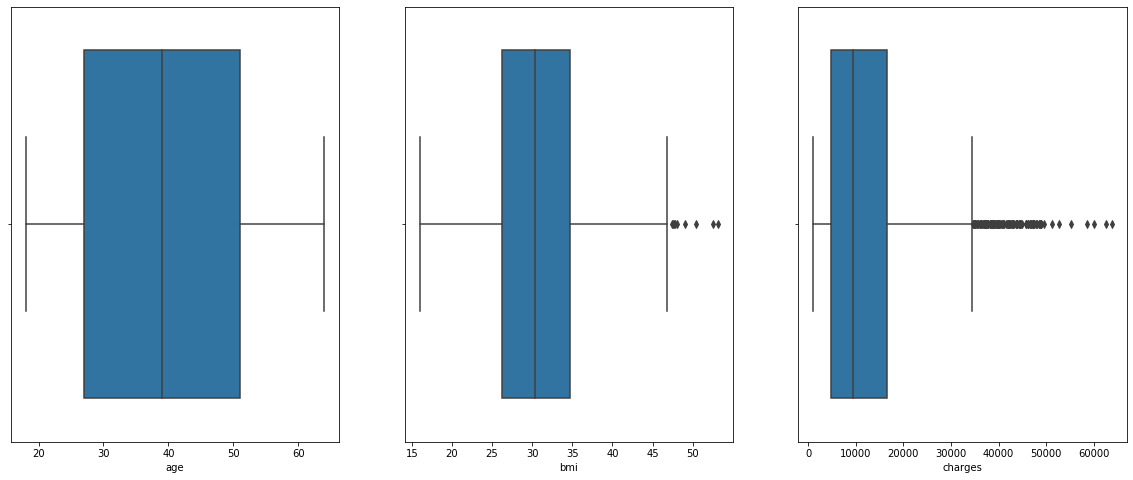

In [8]:
f,axes=plt.subplots(1,3,figsize=(20,8))
sns.boxplot(df.age,ax=axes[0])
sns.boxplot(df.bmi,ax=axes[1])
sns.boxplot(df.charges,ax=axes[2])

Let's see how charges were distributed across categorical variabels and also the distribution of categorical variables

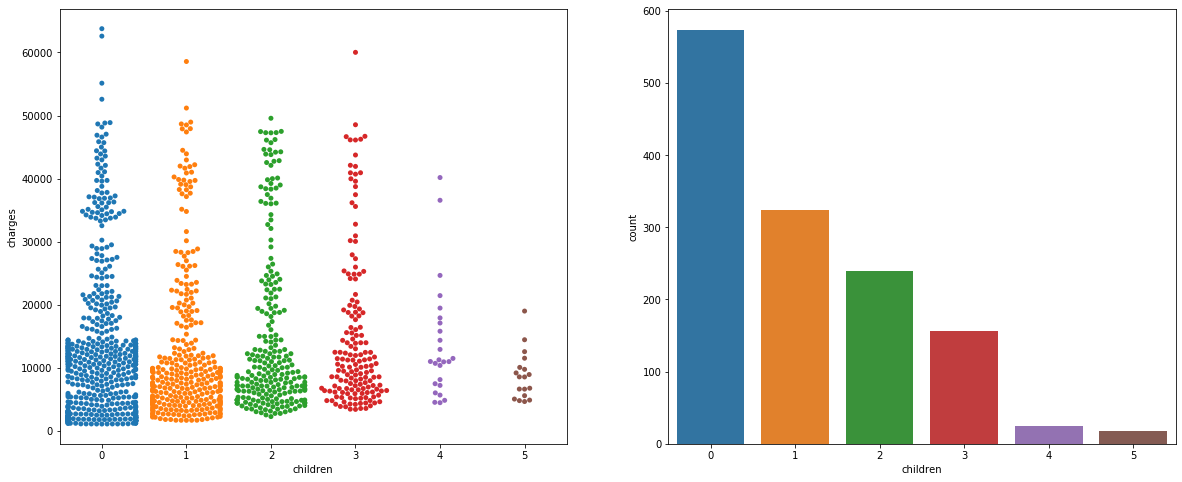

In [9]:
f,axes=plt.subplots(1,2,figsize=(20,8))
sns.swarmplot(df.children,df.charges,ax=axes[0])
sns.countplot(df.children,ax=axes[1])

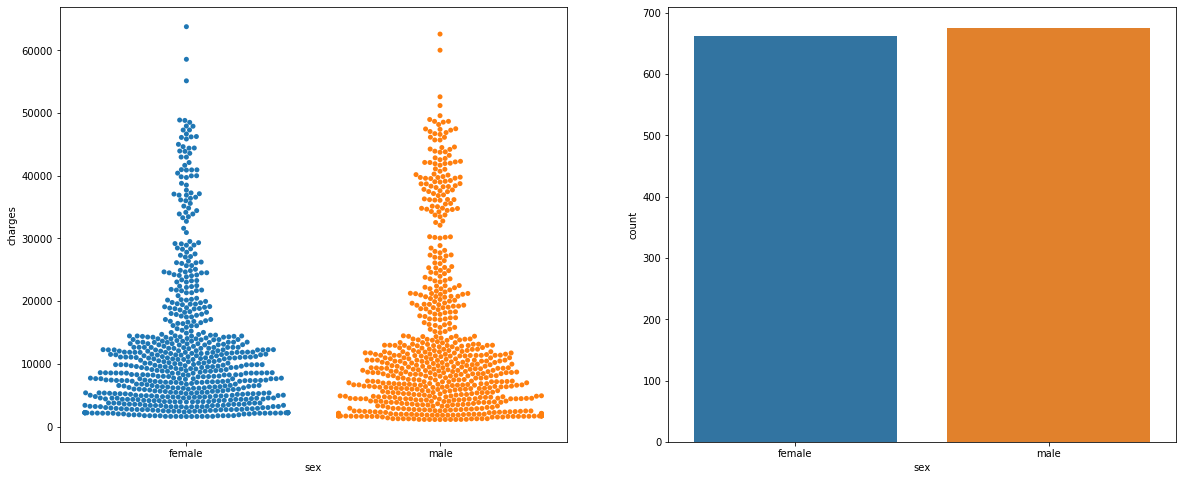

In [10]:
f,axes=plt.subplots(1,2,figsize=(20,8))
sns.swarmplot(df.sex,df.charges,ax=axes[0])
sns.countplot(df.sex,ax=axes[1])

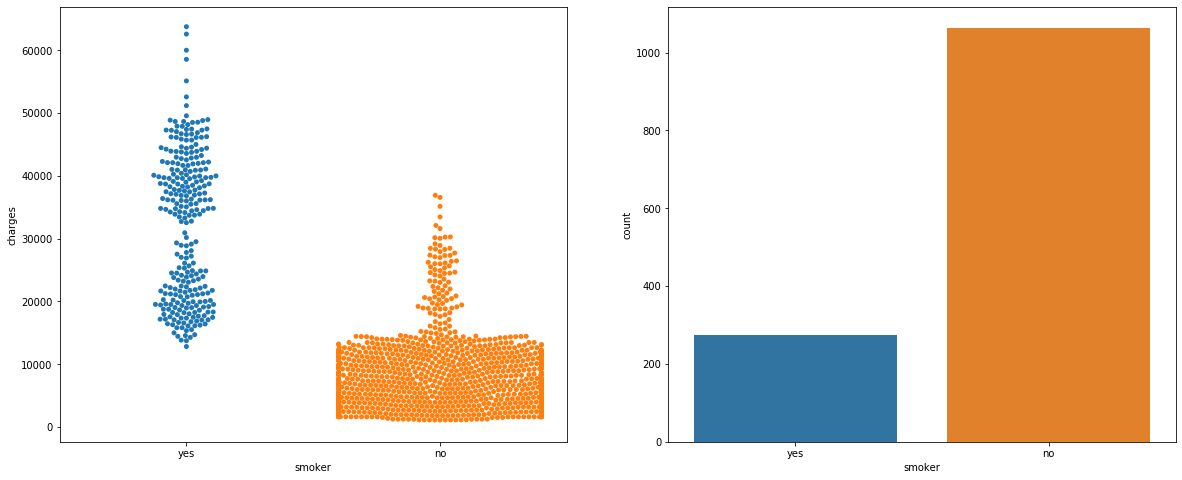

In [11]:
f,axes=plt.subplots(1,2,figsize=(20,8))
sns.swarmplot(df.smoker,df.charges,ax=axes[0])
sns.countplot(df.smoker,ax=axes[1])

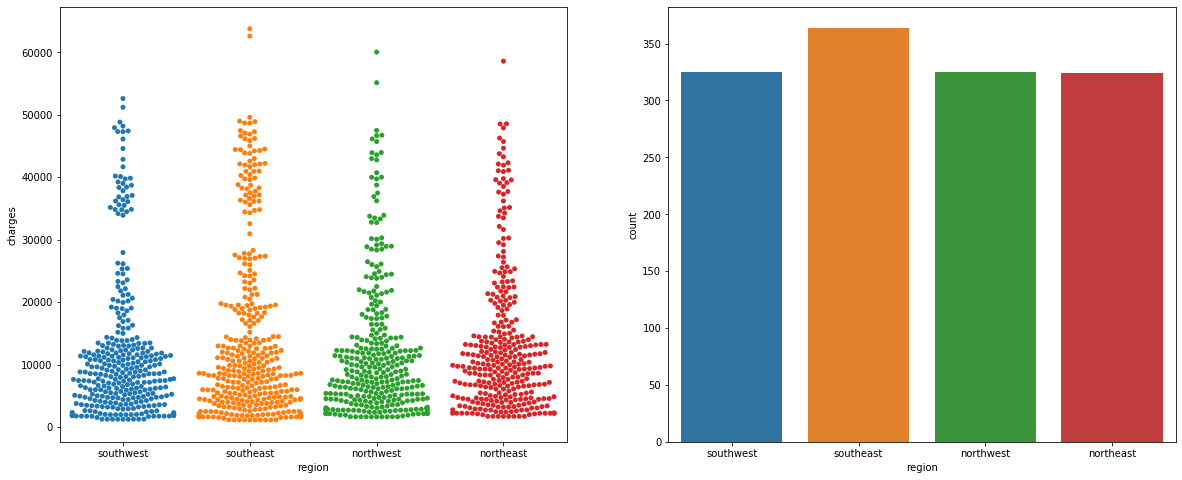

In [12]:
f,axes=plt.subplots(1,2,figsize=(20,8))
sns.swarmplot(df.region,df.charges,ax=axes[0])
sns.countplot(df.region,ax=axes[1])

From the above plots we can see a significant difference in charges of a smoker and a non_smoker


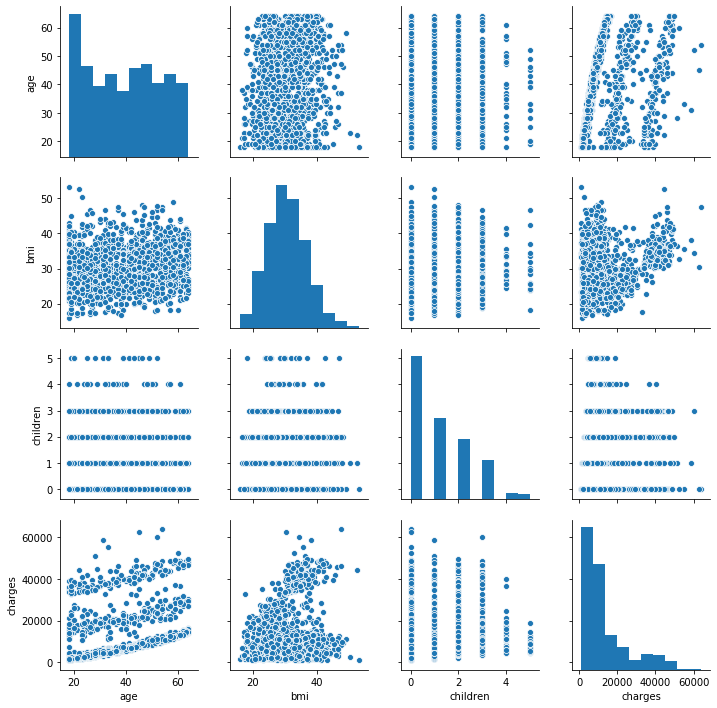

In [13]:
sns.pairplot(df)

# Do smokers have statistically higher mean charges than do non-smokers?

In [43]:
smoker = df[df['smoker']=='yes'] #smoker data frame
non_smoker = df[df['smoker']=='no'] #non smoker data frame 

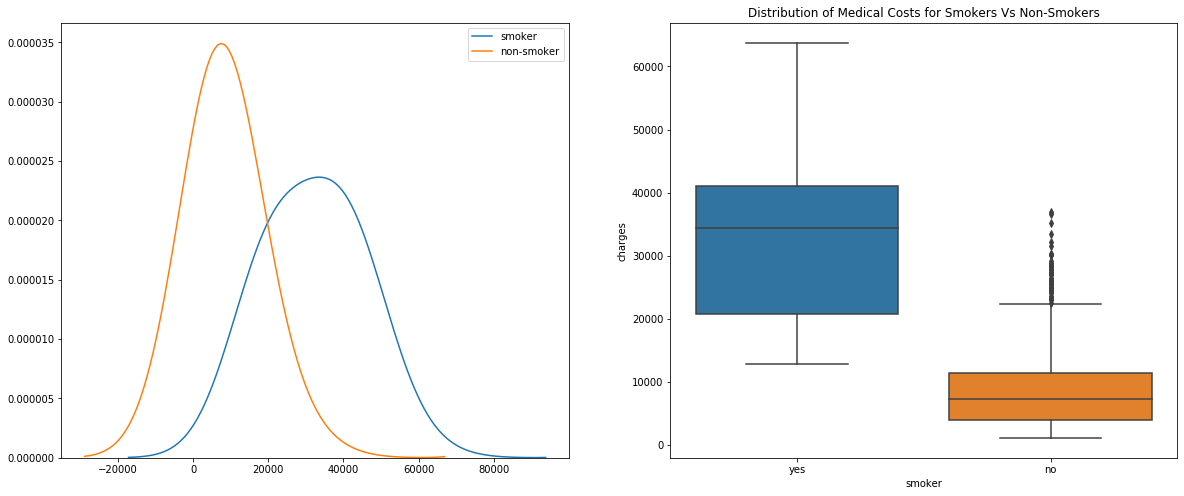

In [44]:
f,axes=plt.subplots(1,2,figsize=(20,8))
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
sns.kdeplot(smoker['charges'], bw=10000, label='smoker',ax=axes[0])
sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker',ax=axes[0])
sns.boxplot(x='smoker',y='charges',data=df)

H0:Both means are same $\mu1$=$\mu2$
   H1:Both are not equal  $\mu1$!=$\mu2$

In [45]:
#converting charges of a smoker into an array
smoker_array=smoker.charges  
smoker=smoker_array.to_numpy()

In [46]:
#converting charges of a non smokers into an array
non_smoker_array=non_smoker.charges
non_smoker=non_smoker_array.to_numpy()

In [47]:
import pylab
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.power import ttest_power

<function matplotlib.pyplot.show(*args, **kw)>

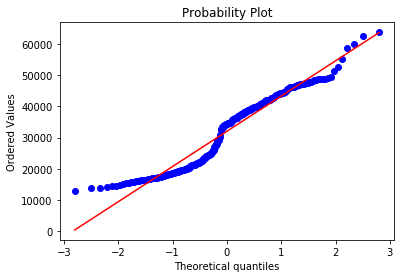

In [48]:
#ploting probplot inorder to know whether the sample is normally distributed or not
stats.probplot(smoker, dist="norm", plot=pylab)
pylab.show                            

<function matplotlib.pyplot.show(*args, **kw)>

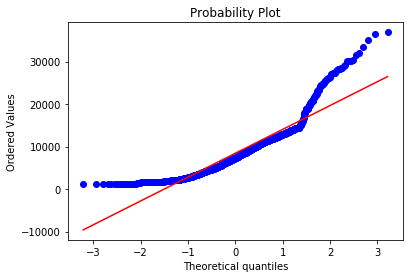

In [49]:
stats.probplot(non_smoker, dist="norm", plot=pylab)
pylab.show

In [50]:
t_statistic,p_value=ttest_ind(smoker,non_smoker)
print(t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


Since the samples are not normally distributed we use manwhitney

In [51]:
u,p=mannwhitneyu(smoker,non_smoker)
print(u,p)

7403.0 2.6351167222517853e-130


for significance level α = 0.05 p-value is very much less, we reject the null hypothesis
#We conclude smokers do charged more than non smokers

# Does bmi of males differ significantly from that of  females?

In [52]:
bmi_male=df[df['sex']=='male'].bmi
male=bmi_male.to_numpy()


In [53]:
bmi_female=df[df['sex']=='female'].bmi
female=bmi_female.to_numpy()

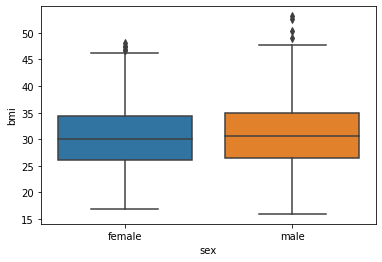

In [54]:
sns.boxplot(x='sex',y='bmi',data=df)

In [55]:
t_statistic,p_value=ttest_ind(bmi_male,bmi_female)
print(t_statistic,p_value)

1.696752635752224 0.08997637178984932


P-value is more than the level of significance α = 0.05.
Hence we accept the Null Hypothesis.
#We conclude there is no significant difference between bmi's of male and female

#  Is the proportion of smokers significantly different  in different genders?  

In [56]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0]

In [57]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


The proportions are different but are they statistically significant?

In [59]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(stat,pval)

-2.7867402154855503 0.005324114164320532


With a p-value of 0.0053 the difference is significant.We reject the null

# Is the distribution of bmi across women with no  children, one child and two children, the same ? 


In [60]:
from   statsmodels.formula.api import ols


In [61]:
df_females=df[df['sex']=='female']

In [62]:
df1=pd.DataFrame()

In [63]:
df1=df_females[df_females['children']<3]

In [64]:
df1.children.value_counts()


0    289
1    158
2    119
Name: children, dtype: int64

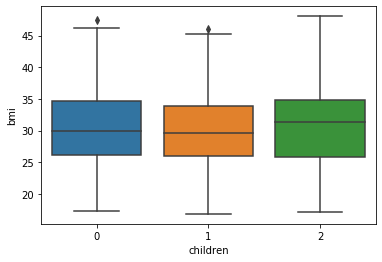

In [65]:
sns.boxplot(x = "children", y = "bmi", data = df1)


$H_0$: $\mu1$ = $\mu2$ = $\mu3$
$H_A$: At least one $\mu$ differs

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [66]:
mod = ols('bmi ~ children', data = df1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


p value is 0.79376 and it is more than our chosen level of signifance at 5%.
We accept the null hypothesis

for charges between a specified amount, there might be a stronger correlation.

In [67]:
for i in range(0,60000,1000):
    data_new = df[df['charges'] >= i]
    print("lower bound: {} \n correlation coefficient: {} \n number of observations: {}".format(i,data_new.bmi.corr(data_new.charges),len(data_new)))
    pass

lower bound: 0 
 correlation coefficient: 0.1983409688336289 
 number of observations: 1338
lower bound: 1000 
 correlation coefficient: 0.1983409688336289 
 number of observations: 1338
lower bound: 2000 
 correlation coefficient: 0.2071642463813623 
 number of observations: 1246
lower bound: 3000 
 correlation coefficient: 0.2103156094702043 
 number of observations: 1147
lower bound: 4000 
 correlation coefficient: 0.2179847052880895 
 number of observations: 1069
lower bound: 5000 
 correlation coefficient: 0.21979606223533085 
 number of observations: 979
lower bound: 6000 
 correlation coefficient: 0.23402630972840618 
 number of observations: 909
lower bound: 7000 
 correlation coefficient: 0.24403352661404865 
 number of observations: 836
lower bound: 8000 
 correlation coefficient: 0.25427461054363676 
 number of observations: 768
lower bound: 9000 
 correlation coefficient: 0.26741941861024193 
 number of observations: 690
lower bound: 10000 
 correlation coefficient: 0.30737

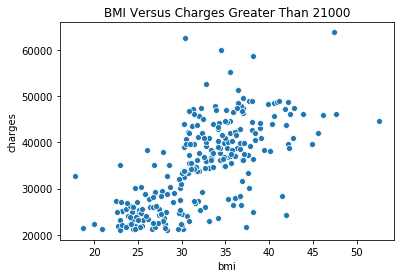

In [68]:
df_new = df[df['charges']>=21000]
plt.title("BMI Versus Charges Greater Than 21000")
ax = sns.scatterplot(x="bmi", y="charges", data=df_new)
plt.show()

In [69]:
df_new.corr()['charges'][:-1]

age         0.056023
bmi         0.672452
children    0.020536
Name: charges, dtype: float64

The maximum correlation between charges and bmi is 0.672452 occurs at charges>=21000


In [1]:
import xgboost as xbg